In [1]:
import os
import sys
current_dir = os.path.dirname(os.path.realpath('__file__'))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)
import numpy as np              # Python's standard numerical library
import matplotlib.pyplot as plt # Python's scientific visualization library
import time
from pyidi import ROISelect
from matplotlib.path import Path
import pickle as pk
from pixel_setter import play_video
from scipy.ndimage import uniform_filter
from EMA_functions import *
from DIC_functions import *
from Feature_selecter import *
root_drive_sim = os.path.normpath('G:/.shortcut-targets-by-id/1k1B8zPb3T8H7y6x0irFZnzzmfQPHMRPx/Illimited Lab Projects/Research Projects/Spiders/Simulations')



c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
file_name =  '1mm_meritev_1_nasproti_1_3g_RMS_1s.cih'
root_video = 'D:/thijsmas/HSC - Ladisk/transfer_104353_files_9c630a94'
file_path = os.path.join(root_video, file_name)
# file_name = 'measurement_0_00_degres_S01.cihx'
EMA_structure = EMA_Structure(file_name)
video = EMA_structure.open_video(add_extension=False)
video.info

D:/thijsmas/HSC - Ladisk\transfer_104353_files_9c630a94\1mm_meritev_1_nasproti_1_3g_RMS_1s.cih


c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\pyMRAW.py:103: UserWarning: Clipped footage! (Total frame: 20000, Original total frame: 102837)
  warnings.warn('Clipped footage! (Total frame: {}, Original total frame: {})'.format(cih['Total Frame'], cih['Original Total Frame'] ))


{'Date': '2018/2/22',
 'Time': '09:41',
 'Camera Type': 'FASTCAM SA-Z type 2100K-M-64GB',
 'Head Type': 'Unknown Child Device',
 'Camera ID': 11,
 'Camera Number': 0,
 'Head Number': 1,
 'Max Head Number': 1,
 'Scene Name': '',
 'User Defined Camera Name': 'Camera No.1',
 'Session Number': '',
 'Date Record': 'Unknown',
 'Time Record': 'Unknown',
 'Trigger Time': 0,
 'Record Rate(fps)': 20000,
 'Shutter Speed(s)': '1/20664',
 'Trigger Mode': 'Start',
 'Original Total Frame': 102837,
 'Total Frame': 20000,
 'Start Frame': 0,
 'Correct Trigger Frame': 0,
 'Save Step': 1,
 'Image Width': 640,
 'Image Height': 696,
 'Color Type': 'Mono',
 'Color Bit': 16,
 'File Format': 'MRaw',
 'EffectiveBit Depth': 12,
 'EffectiveBit Side': 'Higher',
 'Digits Of File Number': 6,
 'Device Last Error': '-1:0xffffffff',
 'Comment Text': '',
 'AnalogBoard Channel Num': 0,
 'Zero Frame': 'Exist',
 'Shutter Type2(nsec)': 48393,
 'Edge Enhance': 0,
 'Pre LUT Mode': 'DEF1',
 'Pre LUT Brightness': 0,
 'Pre LUT C

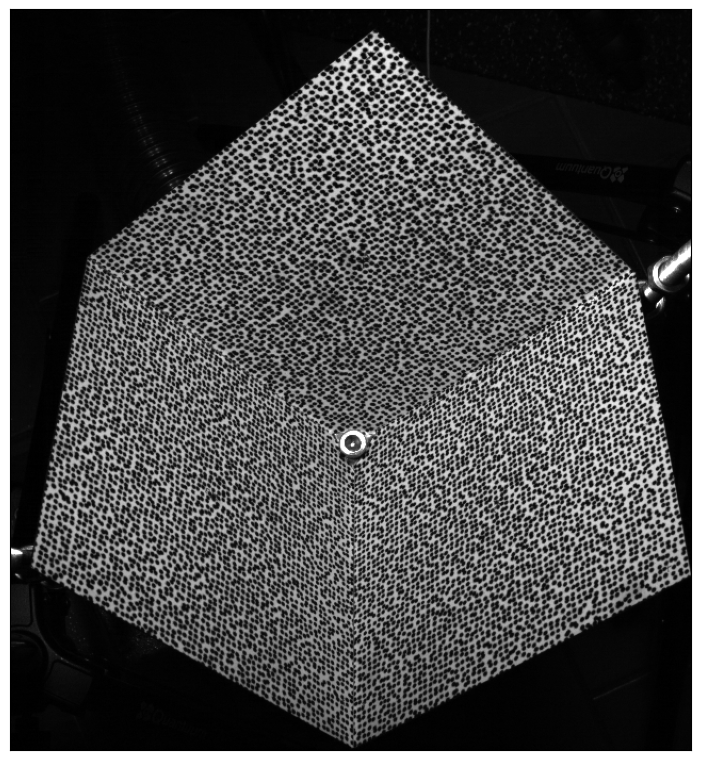

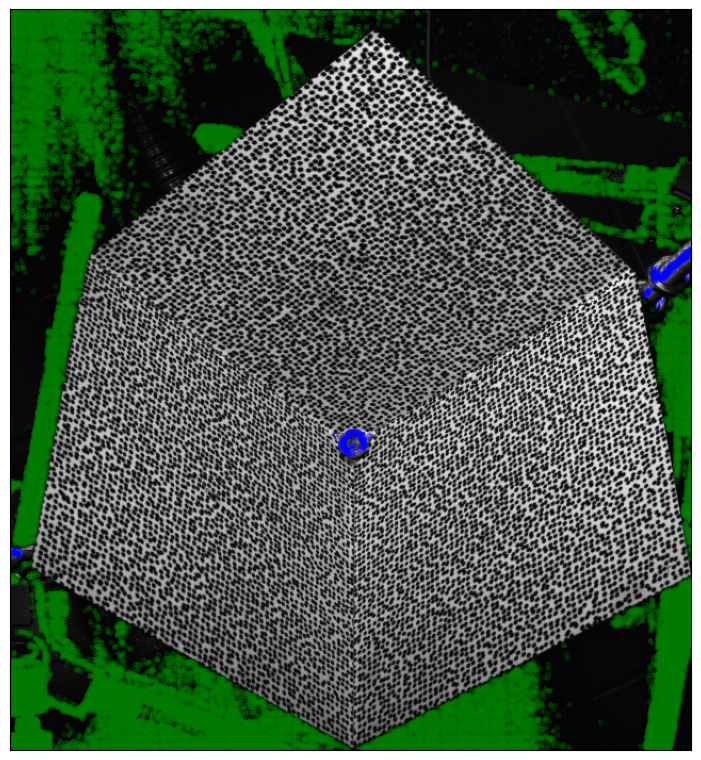

In [3]:
%matplotlib inline
sequential_image_n = 0
still_image = video.mraw[sequential_image_n]

fig, ax = EMA_structure.plot_still_frame(video, sequential_image_n, show_saturation=False, bit_depth = 16)
# fig.savefig(os.path.join(root_drive_sim, 'still images', f'{file_name}_frame_sat0.png'), dpi=300, bbox_inches='tight')
# plt.close(fig)

fig, ax = EMA_structure.plot_still_frame(video, sequential_image_n, show_saturation=True, bit_depth = 16)
# fig.savefig(os.path.join(root_drive_sim, 'still images','with saturation', f'{file_name}_frame_sat1.png'), dpi=300, bbox_inches='tight')
# plt.close(fig)

In [4]:
roi_select = ROISelect(video)
roi_select.polygon
polygon_new = np.array(roi_select.polygon)

polygon_group0 = np.array([[409, 695, 531, 247, 409],
                            [321, 320, 637, 585, 321]])
polygon_group1 = np.array([[409, 693, 522, 231, 409],
                            [321, 322,  20,  73, 321]])
polygon_group2 = np.array([[232, 409, 247,  18, 232],
                            [ 75, 321, 586, 340,  75]])
polygon = np.array([[231,  17, 244, 530, 693, 523, 231],
                     [ 72, 339, 586, 638, 321,  20,  72]])

path = Path(polygon.T)
path_group0 = Path(polygon_group0.T)
path_group1 = Path(polygon_group1.T)
path_group2 = Path(polygon_group2.T)
paths_1d = [path_group0, path_group1, path_group2]

In [5]:
poly_right = polygon_new

In [6]:
poly_left, poly_right

NameError: name 'poly_left' is not defined

In [20]:
%matplotlib qt
first_frame = 500
ani = play_video(video, range(first_frame,800), interval=30, axis = ((618,628),(522,512)) ) #
# ani.save('shell_video_local.mp4', writer='ffmpeg')


In [6]:
%matplotlib qt
# reference_image = (3000, 8000)
# reference_image = (120, video.N)
# mean_image      = np.mean(video.mraw[reference_image[0]:reference_image[1]], axis=0)
# frame_0 = video.mraw[0]
# mean_image_fft = np.fft.fft2(mean_image)
# frame_0_fft = np.fft.fft2(frame_0)
# diff_img = np.abs(mean_image-frame_0)
# diff_img_fft = np.abs(mean_image_fft-frame_0_fft)

# fig, ax = plt.subplots(3,2)
# ax[0,0].imshow(np.abs(mean_image), cmap='gray')
# ax[0,1].imshow(np.abs(frame_0), cmap='gray')
# ax[1,0].imshow(np.abs(mean_image_fft), cmap='gray', vmax = 1e7, vmin = 1e5)
# ax[1,1].imshow(np.abs(frame_0_fft), cmap='gray', vmax = 1e7, vmin = 1e5)
# ax[2,0].imshow(diff_img, cmap='gray')
# ax[2,1].imshow(np.abs(diff_img_fft), cmap='gray', vmax = 1e7, vmin = 1e5)

# np.save('mean_image_inverted_cube2.npy', mean_image)
mean_image = np.load('mean_image_inverted_cube2.npy')
# diff_img  = np.abs(mean_image-video.mraw[0])
# Gx, Gy = np.gradient(mean_image)

# min_Gx = np.min(np.abs(Gx))
# max_Gx = np.max(np.abs(Gx))
# min_Gy = np.min(np.abs(Gy))
# max_Gy = np.max(np.abs(Gy))
# mask = (Gx > 0.1*max_Gx) & (Gy > 0.1*max_Gy)
# angle_pic = np.nan * np.ones_like(Gx)
# angle_pic[mask] = np.arctan(Gy[mask]/Gx[mask])

# fig, ax = plt.subplots(2,2)
# ax[0,0].imshow(mean_image, cmap='gray')
# # ax[1,0].imshow(diff_img, cmap='gray')
# ax[0,1].imshow(np.abs(Gx), cmap='gray')
# ax[1,1].imshow(np.abs(Gy), cmap='gray')
# ax[1,1].imshow(angle_pic, cmap='gray')

# min_Gx, max_Gx, min_Gy, max_Gy

# Set points 2D

In [ ]:
bit_depth = 16
roi_size_vec            = [(3,3), (5,5),(7,7), (9,9), (11,11)]

mask_image = path.contains_points(np.array([(i,j) for i in range(mean_image.shape[0]) for j in range(mean_image.shape[1])]))
mask_image = mask_image.reshape(mean_image.shape)
mean_image_masked = np.copy(mean_image)
# mean_image_masked[~mask_image] = np.nan
mean_image_masked[still_image >= int(0.99*(2**bit_depth-1))] = np.nan
# mean_image_masked[mean_image_masked > 2**16-20] = np.nan

n_tracking_points = 100
for roi_size in roi_size_vec:
    feature_selecter = FeatureSelecter(mean_image_masked)
    feature_selecter.set_filter_method('eig0', roi_size)
    score_full = feature_selecter.apply_filter(downsample=1)
    score_full[~mask_image] = 0
    # maxima2d = feature_selecter.pick_max_filter(score_image = score_full, min_distance = roi_size, absolute_treshold = 0.0) #, top_n_points = n_tracking_points
    # maxima2d = feature_selecter.pick_ANMS(score_image = score_full, n_points=n_tracking_points, c_robust=0.05)  
    maxima2d = feature_selecter.pick_max_loop(score_image = score_full, min_distance = (3,3), n_points = n_tracking_points, minimum_score= 10)
    feature_selecter.plot_score_image(maxima=False)

    video.set_method('lk')
    video.method.configure(roi_size = roi_size, reference_image = mean_image, resume_analysis=False) #, mraw_range=(1, 1000)
    video.set_points(maxima2d)
    start_time = time.time()
    displacement = video.get_displacements(processes = 1)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f'roi_size: {roi_size},  elapsed_time: {elapsed_time}, total steps: {video.method.total_steps}')


## Set points 1D

In [11]:
%matplotlib qt
bit_depth = 16
n_tracking_points = 100
s_vec = np.array([[0.44759716, 0.89423531], [-0.55271155,  0.83337263], [-0.96837048,  0.24951675]]) # i,j format!
roi_size_vec            = [(3,3), (5,5),(7,7), (9,9), (11,11)]  #
smoothing_subset        = (1, 1)

mean_image_masked = np.copy(mean_image)
Gi, Gj = np.gradient(mean_image_masked)
s = s_vec[1]
Gs  = np.abs(s[1]*Gi + s[0]*Gj)
mask_image = path.contains_points(np.array([(i,j) for i in range(mean_image.shape[0]) for j in range(mean_image.shape[1])])).reshape(mean_image.shape)
mask_image = mask_image.reshape(mean_image.shape)
for roi_size in roi_size_vec:
    filtered_image = uniform_filter(Gs, size=roi_size[0])
    filtered_image[~mask_image] = 0
    filtered_image[still_image >= int(0.99*(2**bit_depth-1))] = 0
    feature_selecter = FeatureSelecter(filtered_image)

    # maxima1d = feature_selecter.pick_max_filter(score_image = filtered_image, min_distance = roi_size[0], absolute_treshold = None, threshold_percentage = 0, top_n_points = n_tracking_points)
    # maxima1d = feature_selecter.pick_ANMS(score_image = filtered_image, n_points=n_tracking_points, c_robust=0.05)
    maxima1d = feature_selecter.pick_max_loop(score_image = filtered_image, min_distance = (3,3), n_points = n_tracking_points, minimum_score= 10)

    feature_selecter.score_image = filtered_image
    # feature_selecter.plot_score_image(maxima=True)
    video.set_method('lk_1D')
    video.set_points(maxima1d)

    video.info['Direction'] = s.tolist()
    video.info['Polygon'] = path.vertices.tolist()
    video.method.configure(roi_size = roi_size, dyx = s, reference_image = mean_image,  resume_analysis=False, smoothing_size = smoothing_subset) #, mraw_range=(120, video.N -1)
    # video.method.configure(roi_size = roi_size, dxy = np.array([s[1], s[0]]), subset_size = smoothing_subset, reference_image = mean_image, resume_analysis=False) #, mraw_range=(1, 1000), subset_size = 3,          
    start_time = time.time()
    displacement_1d = video.get_displacements(processes=1)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f'roi_size: {roi_size},  elapsed_time: {elapsed_time}, total steps: {video.method.total_steps}')


Available filter methods: eig0, eig1, harris, trigs, harmonic_mean, eig_theta, eig_theta_off, eig0_test, eig1_test
--- Starting new analysis ---
 
Interpolating the reference image...
...done in 0.01 s


C:\Users\thijsmas\Documents\GitHub\pyidi\pyidi\methods\_directional_lucas_kanade.py:124: UserWarning: The direction vector d must have a norm of 1. The input vector was normalized.
  warnings.warn('The direction vector d must have a norm of 1. The input vector was normalized.')
c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


VBox()

Time to complete: 18 min, 33.4 s
D:/thijsmas/HSC - Ladisk\transfer_104353_files_9c630a94\1mm_meritev_1_nasproti_1_3g_RMS_1s_pyidi_analysis\analysis_054\ analysis_054
roi_size: (3, 3),  elapsed_time: 1113.5055401325226, total steps: 16040121
Available filter methods: eig0, eig1, harris, trigs, harmonic_mean, eig_theta, eig_theta_off, eig0_test, eig1_test
--- Starting new analysis ---
 
Interpolating the reference image...
...done in 0.01 s


VBox()

Time to complete: 18 min, 54.2 s
D:/thijsmas/HSC - Ladisk\transfer_104353_files_9c630a94\1mm_meritev_1_nasproti_1_3g_RMS_1s_pyidi_analysis\analysis_055\ analysis_055
roi_size: (5, 5),  elapsed_time: 1134.219209432602, total steps: 18124369
Available filter methods: eig0, eig1, harris, trigs, harmonic_mean, eig_theta, eig_theta_off, eig0_test, eig1_test
--- Starting new analysis ---
 
Interpolating the reference image...
...done in 0.01 s


VBox()

Time to complete: 20 min, 8.0 s
D:/thijsmas/HSC - Ladisk\transfer_104353_files_9c630a94\1mm_meritev_1_nasproti_1_3g_RMS_1s_pyidi_analysis\analysis_056\ analysis_056
roi_size: (7, 7),  elapsed_time: 1208.0533928871155, total steps: 18951854
Available filter methods: eig0, eig1, harris, trigs, harmonic_mean, eig_theta, eig_theta_off, eig0_test, eig1_test
--- Starting new analysis ---
 
Interpolating the reference image...
...done in 0.01 s


VBox()

Time to complete: 20 min, 5.8 s
D:/thijsmas/HSC - Ladisk\transfer_104353_files_9c630a94\1mm_meritev_1_nasproti_1_3g_RMS_1s_pyidi_analysis\analysis_057\ analysis_057
roi_size: (9, 9),  elapsed_time: 1205.8973870277405, total steps: 20125361
Available filter methods: eig0, eig1, harris, trigs, harmonic_mean, eig_theta, eig_theta_off, eig0_test, eig1_test
--- Starting new analysis ---
 
Interpolating the reference image...
...done in 0.01 s


VBox()

Time to complete: 20 min, 23.8 s
D:/thijsmas/HSC - Ladisk\transfer_104353_files_9c630a94\1mm_meritev_1_nasproti_1_3g_RMS_1s_pyidi_analysis\analysis_058\ analysis_058
roi_size: (11, 11),  elapsed_time: 1223.8339960575104, total steps: 20544218


In [ ]:
score_list = filtered_image[maxima1d[:, 0], maxima1d[:, 1]]
fig, ax = plt.subplots(1, 1, figsize=(15, 7.5))
fig.set_tight_layout(True)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(mean_image, cmap='gray')
ax.scatter(maxima1d[:,1], maxima1d[:,0], marker='o',s=10, c=score_list, cmap='RdYlGn')
ax.plot(polygon[1], polygon[0], color='k', lw=0.5)
plt.show()

In [ ]:
s_vec_loaded = np.load('s_vec.npy')
s_vec_loaded

In [ ]:
%matplotlib qt
s_vec = np.array([[0.44759716, 0.89423531], [-0.55271155,  0.83337263], [-0.96837048,  0.24951675]]) # i,j format!
# n_tracking_points = 2682
n_tracking_points = 24
# n_tracking_points       = int(n_tracking_points/3)

roi_size = (15,15)
smoothing_size = (3,3)
s = s_vec[0]
path = paths_1d[0]

mask_image = path_group0.contains_points(np.array([(i,j) for i in range(mean_image.shape[0]) for j in range(mean_image.shape[1])])).reshape(mean_image.shape)
mask_image = mask_image.reshape(mean_image.shape)

mean_image_masked = np.copy(mean_image)
Gi, Gj = np.gradient(mean_image_masked)
Gs  = np.abs(s[0]*Gi + s[1]*Gj)
    
filtered_image = uniform_filter(Gs, size=roi_size)
filtered_image[~mask_image] = 0
filtered_image[mean_image_masked >= int(0.99*(2**bit_depth-1))] = 0
fig, ax = plt.subplots()
ax.imshow(filtered_image, cmap='gray')
feature_selecter = FeatureSelecter(filtered_image)

feature_selecter.score_image = filtered_image
# maxima1d = feature_selecter.pick_max_filter(score_image = filtered_image, min_distance = roi_size[0], absolute_treshold = None, threshold_percentage = 0, top_n_points = n_tracking_points)
# maxima1d = feature_selecter.pick_ANMS(score_image = filtered_image, n_points=n_tracking_points, c_robust=0.05)
maxima1d = feature_selecter.pick_max_loop(score_image = filtered_image, min_distance = (9,9), n_points = n_tracking_points, minimum_score= 1000)

feature_selecter.plot_score_image(maxima=True)
video.set_method('lk_1D')
# video.set_method('lk')
video.set_points(maxima1d)
video.show_points()
video.info['Direction'] = s.tolist()
video.info['Polygon'] = path.vertices.tolist()

video.method.configure(roi_size = roi_size, dyx = s, smoothing_size = smoothing_size, reference_image = mean_image, resume_analysis=False, max_nfev = 50, mraw_range=(121, 1121)) #, mraw_range=(3000, 8000), subset_size = 3,          
# video.method.configure(roi_size = roi_size, dyx = s_vec_loaded, subset_size = smoothing_subset, reference_image = mean_image, resume_analysis=False, max_nfev = 50, mraw_range=(3000, 8000)) #, mraw_range=(1, 1000), subset_size = 3,          
# video.method.configure(roi_size = roi_size, reference_image = mean_image, resume_analysis=False, max_nfev = 50, mraw_range=(3000, 8000)) #, mraw_range=(1, 1000), subset_size = 3,          
print(f'roi_size: {roi_size}, smoothing_subset: {smoothing_size}, s: {s}')
# displacement_1d = video.get_displacements(processes=1)
displacement_1d = video.get_displacements(processes=24)

scores  = filtered_image[maxima1d[:,0], maxima1d[:,1]]
scores.min(), scores.max(), scores.mean(), scores.std()



In [ ]:
video.set_method('lk_1D')
d = (0,1)
video.method.configure(roi_size = roi_size, d = d, reference_image = reference_image, resume_analysis=False) #, mraw_range=(1, 1000)
video.set_points(maxima1d[mask_points])

In [ ]:
displacement_1d = video.get_displacements(processes=24)
EMA_structure.displacements = displacement
EMA_structure.maxima = maxima1d
EMA_structure.mean_image = mean_image
root = 'C:/Users/thijsmas/Documents/GitHub/pyidi_data/'
path = os.path.join(root, 'EMA structure', file_name+f'_1d_roi{roi_size[0]}x{roi_size[1]}.pkl')
with open(path, 'wb') as f:
    pk.dump(EMA_structure, f)

In [ ]:
roi_size_2d = (7,7)
roi_size_1d = (3,3)
reference_image = (0, 150)
n_tracking_points_1d = 6000
n_tracking_points_2D = 6000
Polygon = Path(polygon.T)
d = (0,1)
s = np.array([0,1])
root = 'C:/Users/thijsmas/Documents/GitHub/pyidi_data/'

for path_c in path_list:
    file_name = os.path.basename(path_c)
    EMA_structure = EMA_Structure(file_name[:-5] + '.cih')
    video = EMA_structure.open_video(add_extension=False)

    mean_image      = np.mean(video.mraw[reference_image[0]:reference_image[1]], axis=0)

    feature_selecter = FeatureSelecter(mean_image)
    feature_selecter.set_filter_method('eig0', roi_size_2d)
    score_full = feature_selecter.apply_filter(downsample=1)
    maxima2d = feature_selecter.pick_max_filter(score_image = score_full, min_distance = roi_size_2d, absolute_treshold = 0.0) #, top_n_points = n_tracking_points
    mask_points = Polygon.contains_points(maxima2d)

    video.set_method('lk')
    video.method.configure(roi_size = roi_size_2d, reference_image = reference_image, resume_analysis=False) #, mraw_range=(1, 1000)
    video.set_points(maxima2d[mask_points])

    displacement = video.get_displacements(processes = 24)
    EMA_structure.displacements = displacement
    EMA_structure.maxima = maxima2d[mask_points]
    EMA_structure.mean_image = mean_image
    
    path = os.path.join(root, 'EMA structure', file_name+f'_2d_roi{roi_size_2d[0]}x{roi_size_2d[1]}.pkl')
    with open(path, 'wb') as f:
        pk.dump(EMA_structure, f)
    
    Gi, Gj = np.gradient(mean_image)
    
    Gs  = s[0]*Gj + s[1]*Gi
    filtered_image = uniform_filter(Gs, size=roi_size_1d[0])
    maxima1d = feature_selecter.pick_max_filter(score_image = Gi, min_distance = roi_size_1d[0], absolute_treshold = None, threshold_percentage = 0, top_n_points = n_tracking_points)

    mask_points = Polygon.contains_points(maxima1d)
    video.set_method('lk_1D')
    video.method.configure(roi_size = roi_size_1d, d = d, reference_image = reference_image, resume_analysis=False) #, mraw_range=(1, 1000)
    video.set_points(maxima1d[mask_points])

    displacement = video.get_displacements(processes=24)
    EMA_structure.displacements = displacement
    EMA_structure.maxima = maxima1d[mask_points]
    EMA_structure.mean_image = mean_image

    path = os.path.join(root, 'EMA structure', file_name+f'_1d_roi{roi_size_1d[0]}x{roi_size_1d[1]}.pkl')
    with open(path, 'wb') as f:
        pk.dump(EMA_structure, f)
